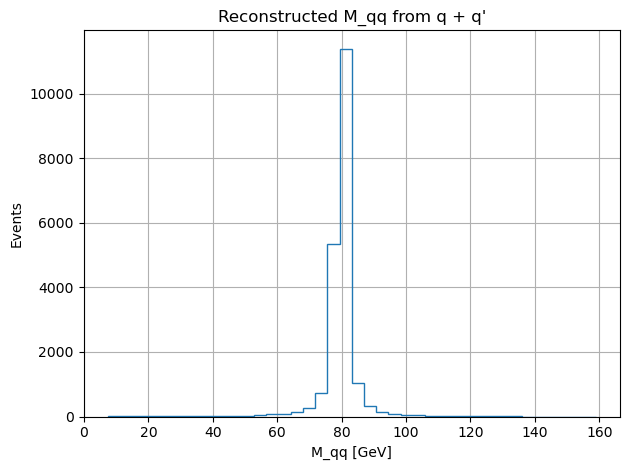

In [1]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt

def get_four_vector(p):
    return {
        "E": p.e,
        "px": p.px,
        "py": p.py,
        "pz": p.pz
    }

def inv_mass(p1, p2):
    e = p1["E"] + p2["E"]
    px = p1["px"] + p2["px"]
    py = p1["py"] + p2["py"]
    pz = p1["pz"] + p2["pz"]
    return np.sqrt(e**2 - px**2 - py**2 - pz**2)

lhe_file = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_decay/result_WR3000_N2100/cmsgrid_final.lhe"

qq_masses = []

for event in pylhe.read_lhe_with_attributes(lhe_file):
    particles = event.particles

    # final state quarks: pdgId = ±1, ±2, ±3, ±4 (u, d, s, c)
    final_quarks = [p for p in particles if abs(p.id) in [1, 2, 3, 4] and p.status == 1]

    if len(final_quarks) >= 2:
        # Select two leading (or first two) quarks
        vec1 = get_four_vector(final_quarks[0])
        vec2 = get_four_vector(final_quarks[1])
        m_qq = inv_mass(vec1, vec2)
        qq_masses.append(m_qq)

# Plotting
plt.hist(qq_masses, bins=40, histtype='step')
plt.xlabel("M_qq [GeV]")
plt.ylabel("Events")
plt.title("Reconstructed M_qq from q + q'")
plt.grid(True)
plt.tight_layout()
plt.show()
